In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='Walker2d-v4'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(211615, 17)


In [5]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(236191, 17)


In [6]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,25-07-2023 12:54:27,50,0,50,0.002485,1,51,True,-3.673218,-3.673218,-3.673218,-3.673218,-3.673218,COMPER
1,1,2,Walker2d-v4,25-07-2023 12:54:30,51,0,51,0.002535,1,52,True,-4.635257,-4.154237,-4.154237,-4.154237,-4.154237,COMPER
2,1,3,Walker2d-v4,25-07-2023 12:54:33,52,0,52,0.002585,1,53,True,-5.053428,-4.453968,-4.453968,-4.453968,-4.453968,COMPER
3,1,4,Walker2d-v4,25-07-2023 12:54:36,53,0,53,0.002634,1,54,True,-4.363319,-4.431305,-4.431305,-4.431305,-4.431305,COMPER
4,1,5,Walker2d-v4,25-07-2023 12:54:39,54,0,54,0.002684,1,55,True,-1.985724,-3.942189,-3.942189,-3.942189,-3.942189,COMPER
5,1,6,Walker2d-v4,25-07-2023 12:54:42,55,0,55,0.002734,1,56,True,2.519633,-2.865219,-2.865219,-2.865219,-2.865219,COMPER
6,1,7,Walker2d-v4,25-07-2023 12:54:46,56,0,56,0.002783,1,57,True,9.248727,-1.134655,-1.134655,-1.134655,-1.134655,COMPER
7,1,8,Walker2d-v4,25-07-2023 12:54:49,57,0,57,0.002833,1,58,True,17.527566,1.198123,1.198123,1.198123,1.198123,COMPER
8,1,9,Walker2d-v4,25-07-2023 12:54:51,58,0,58,0.002883,1,59,True,23.254586,3.648841,3.648841,3.648841,3.648841,COMPER
9,1,10,Walker2d-v4,25-07-2023 12:54:54,59,0,59,0.002933,1,60,True,26.929837,5.976940,5.976940,5.976940,5.976940,COMPER


In [7]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,20-07-2023 00:48:06,83,84,0,0.004125,1,84,True,31.167440,31.167440,31.167440,31.167440,31.167440,DDPG
1,1,2,Walker2d-v4,20-07-2023 00:48:06,84,85,0,0.004175,1,85,True,31.226134,31.196787,31.196787,31.196787,31.196787,DDPG
2,1,3,Walker2d-v4,20-07-2023 00:48:06,85,86,0,0.004225,1,86,True,31.412292,31.268622,31.268622,31.268622,31.268622,DDPG
3,1,4,Walker2d-v4,20-07-2023 00:48:06,86,87,0,0.004275,1,87,True,31.807694,31.403390,31.403390,31.403390,31.403390,DDPG
4,1,5,Walker2d-v4,20-07-2023 00:48:06,87,88,0,0.004324,1,88,True,32.449491,31.612610,31.612610,31.612610,31.612610,DDPG
5,1,6,Walker2d-v4,20-07-2023 00:48:06,88,89,0,0.004374,1,89,True,33.342650,31.900950,31.900950,31.900950,31.900950,DDPG
6,1,7,Walker2d-v4,20-07-2023 00:48:06,89,90,0,0.004424,1,90,True,34.289199,32.242129,32.242129,32.242129,32.242129,DDPG
7,1,8,Walker2d-v4,20-07-2023 00:48:06,90,91,0,0.004473,1,91,True,35.160973,32.606984,32.606984,32.606984,32.606984,DDPG
8,1,9,Walker2d-v4,20-07-2023 00:48:07,91,92,0,0.004523,1,92,True,35.714270,32.952238,32.952238,32.952238,32.952238,DDPG
9,1,10,Walker2d-v4,20-07-2023 00:48:07,92,93,0,0.004573,1,93,True,36.154023,33.272417,33.272417,33.272417,33.272417,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,25-07-2023 12:54:27,50,0,50,0.002485,1,51,True,-3.673218,-3.673218,-3.673218,-3.673218,-3.673218,COMPER
1,1,2,Walker2d-v4,25-07-2023 12:54:30,51,0,51,0.002535,1,52,True,-4.635257,-4.154237,-4.154237,-4.154237,-4.154237,COMPER
2,1,3,Walker2d-v4,25-07-2023 12:54:33,52,0,52,0.002585,1,53,True,-5.053428,-4.453968,-4.453968,-4.453968,-4.453968,COMPER
3,1,4,Walker2d-v4,25-07-2023 12:54:36,53,0,53,0.002634,1,54,True,-4.363319,-4.431305,-4.431305,-4.431305,-4.431305,COMPER
4,1,5,Walker2d-v4,25-07-2023 12:54:39,54,0,54,0.002684,1,55,True,-1.985724,-3.942189,-3.942189,-3.942189,-3.942189,COMPER


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
44582,5,44583,Walker2d-v4,20-07-2023 08:22:08,49997,49042,0,0.999,50,998,True,1009.061246,549.455594,959.831012,984.737613,1004.561876,DDPG
44583,5,44584,Walker2d-v4,20-07-2023 08:22:08,49998,49043,0,0.999,50,999,True,1010.063706,549.465925,960.826549,985.729156,1005.561510,DDPG
44584,5,44585,Walker2d-v4,20-07-2023 08:22:08,49999,49044,0,0.999,50,1000,True,1011.065471,549.476278,961.822244,986.720909,1006.561611,DDPG
44585,5,44586,Walker2d-v4,20-07-2023 08:22:08,50000,49045,0,0.999,50,1001,True,1012.064939,549.486653,962.818071,987.712846,1007.561745,DDPG
44586,5,44587,Walker2d-v4,20-07-2023 08:22:08,50001,49046,0,0.999,51,2,True,0.657271,549.474344,953.689937,968.456852,907.321171,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

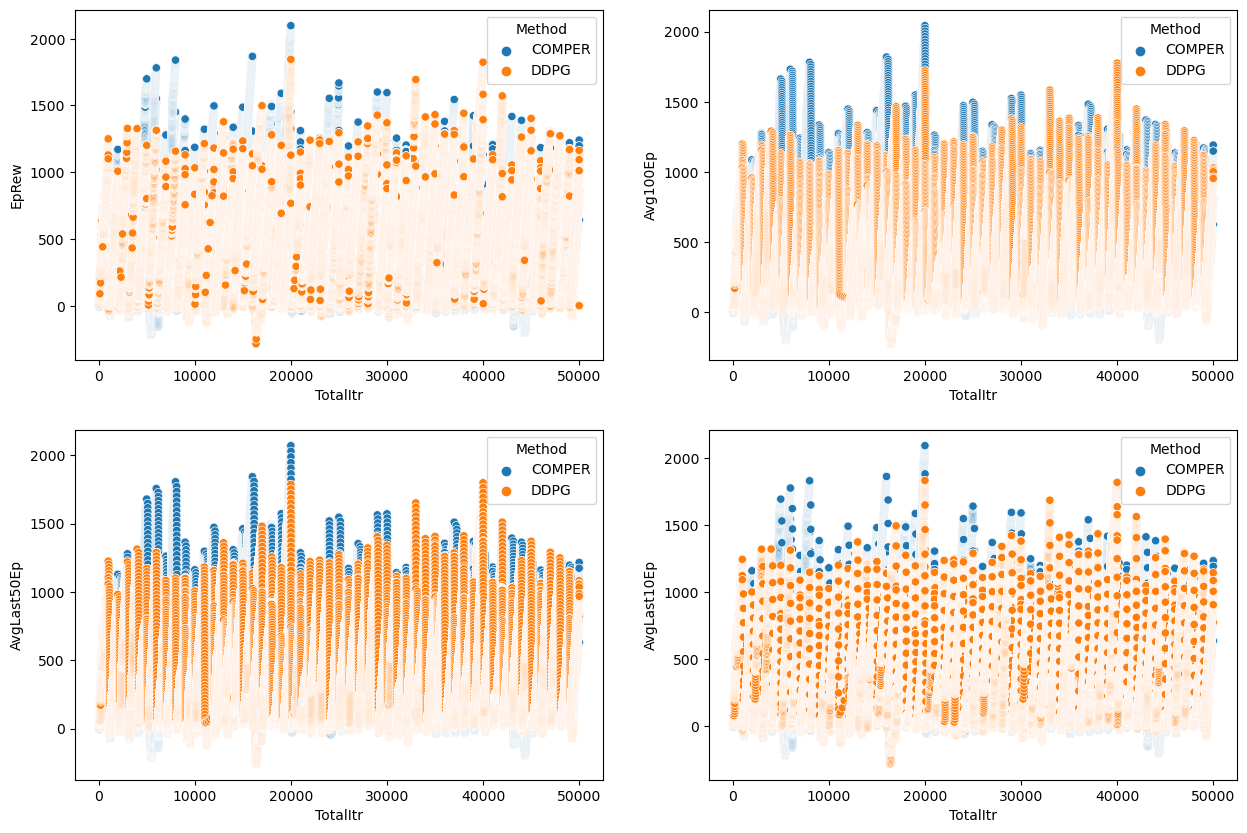

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.scatterplot(data=df, x="TotalItr", y="EpRew", hue="Method",ax=axs[0][0])
sns.scatterplot(data=df, x="TotalItr", y="Avg100Ep", hue="Method",ax=axs[0][1])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast50Ep", hue="Method",ax=axs[1][0])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast10Ep", hue="Method",ax=axs[1][1])

KeyboardInterrupt: 

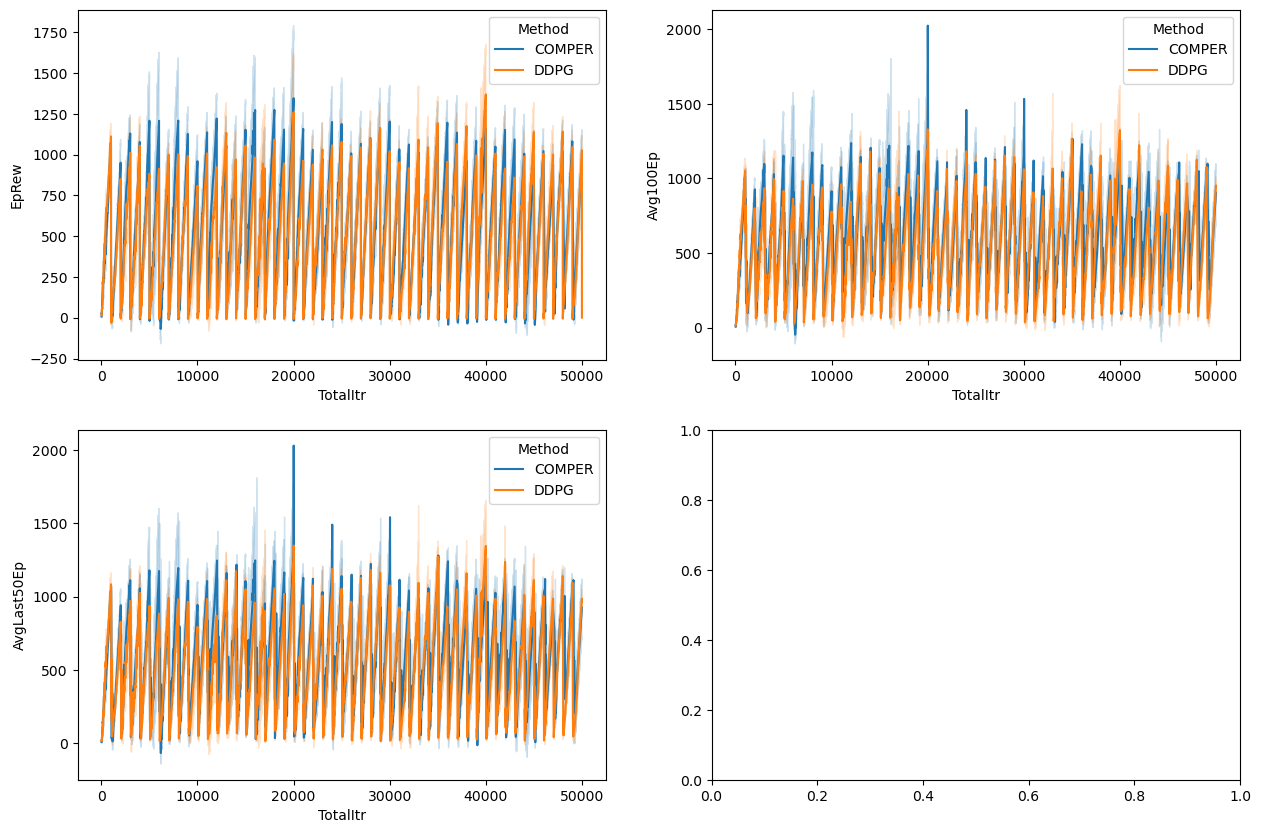

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [ ]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,01-06-2023 21:56:23,Walker2d-v4,5000,5.461533,COMPER
1,1,02-06-2023 01:39:43,Walker2d-v4,10000,-2.291599,COMPER
2,1,02-06-2023 05:21:50,Walker2d-v4,15000,-5.181290,COMPER
3,1,02-06-2023 09:00:02,Walker2d-v4,20000,-5.176556,COMPER
4,1,02-06-2023 12:41:58,Walker2d-v4,25000,-5.153623,COMPER


In [ ]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-1.132773
std,1.428571,14507.211437,2.797559
min,1.000000,5000.000000,-5.222343
25%,2.000000,15000.000000,-2.200718
50%,3.000000,27500.000000,-2.077849
75%,4.000000,40000.000000,1.750401
max,5.000000,50000.000000,6.110718


In [ ]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,12-06-2023 21:51:35,Walker2d-v4,5000,6.141744,DDPG
1,1,12-06-2023 21:59:13,Walker2d-v4,10000,-2.159604,DDPG
2,1,12-06-2023 22:07:18,Walker2d-v4,15000,-2.035423,DDPG
3,1,12-06-2023 22:15:52,Walker2d-v4,20000,-2.051537,DDPG
4,1,12-06-2023 22:24:56,Walker2d-v4,25000,-2.080868,DDPG


In [ ]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-1.650243
std,1.428571,14507.211437,2.361209
min,1.000000,5000.000000,-3.691144
25%,2.000000,15000.000000,-2.192611
50%,3.000000,27500.000000,-2.073274
75%,4.000000,40000.000000,-1.948403
max,5.000000,50000.000000,6.225030


In [ ]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

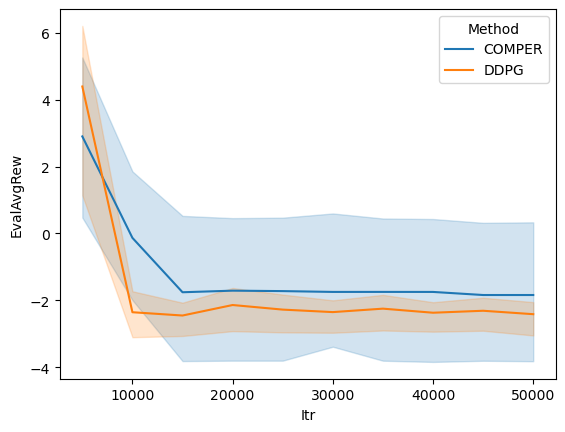

In [ ]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')